In [ ]:
from google.colab import files
my_image = files.upload()

Saving my_image.jpg to my_image.jpg


In [ ]:
# @title
from skimage import io
my_image = io.imread('my_image.jpg')  #The loaded image is represented as Numpy Array Vector where each element represents a pixel's intensity value(If the image is grayscale,my_image is a 2D array and if the image is RGB,then my_image is a 3D array)
print(f'Datatype = {my_image.dtype}') #.dtype returns the data type of the pixel - unit8(unsigned 8-bit integer): Values range from 0 to 255(common for images), float64: values range from 0.0 to 1.0(some image processing libraries use this)
print(f'Value range = {2**8}')
print(f'Dimension = {my_image.shape}') #Returns the image dimensions (height,width,3) for RGB
print(' The image numpy array ')
print(my_image)


Datatype = uint8
Value range = 256
Dimension = (622, 1001, 3)
 The image numpy array 
[[[154 217 234]
  [154 217 234]
  [154 217 234]
  ...
  [163  73 163]
  [163  73 163]
  [163  73 163]]

 [[154 217 234]
  [154 217 234]
  [154 217 234]
  ...
  [163  73 163]
  [163  73 163]
  [163  73 163]]

 [[154 217 234]
  [154 217 234]
  [154 217 234]
  ...
  [163  73 163]
  [163  73 163]
  [163  73 163]]

 ...

 [[154 217 234]
  [154 217 234]
  [154 217 234]
  ...
  [ 35 177  77]
  [ 35 177  77]
  [ 35 177  77]]

 [[154 217 234]
  [154 217 234]
  [154 217 234]
  ...
  [ 35 177  77]
  [ 35 177  77]
  [ 35 177  77]]

 [[154 217 234]
  [154 217 234]
  [154 217 234]
  ...
  [ 35 177  77]
  [ 35 177  77]
  [ 35 177  77]]]


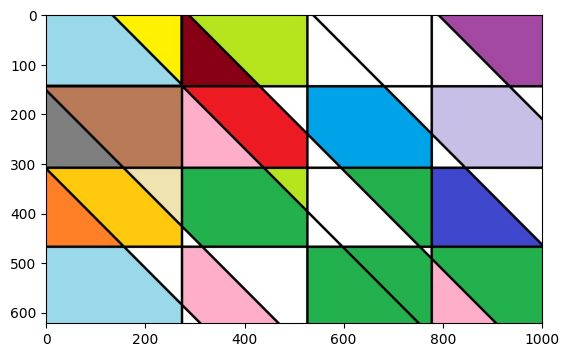

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(my_image)

In [ ]:
print(f'Dimension = {my_image.shape}')

Dimension = (622, 1001, 3)


In [ ]:
from skimage import img_as_float
my_float_img = img_as_float(my_image)  #This converts image from unsigned integers to floating point numbers
print(my_float_img.min(),my_float_img.max())

0.0 1.0


In [ ]:
my_dark_image = my_float_img.copy()
my_dark_image = my_dark_image * [0.8,0.2,0.2] #This will extract the the red feature of the image more predominantly
print(my_dark_image.min(),my_dark_image.max())


0.0 0.8


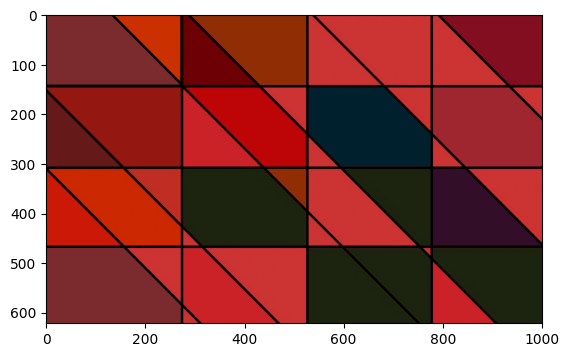

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(my_dark_image)

In [ ]:
import sys
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

In [ ]:
data_path = '/content/drive/MyDrive/data'
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])  #This converts the image from PIL format(Numpy array) to Pytorch tensor and changes the pixel values from the range [0,255] to [0.0,1.0]
full_train_set = dset.MNIST(root=data_path, train=True, transform=trans, download=True)
full_test_set = dset.MNIST(root=data_path, train=False, transform=trans)
batch_size = 16   #It represents the number of images in each batch

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.5MB/s]


Extracting /content/drive/MyDrive/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 501kB/s]


Extracting /content/drive/MyDrive/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]


Extracting /content/drive/MyDrive/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.26MB/s]

Extracting /content/drive/MyDrive/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/data/MNIST/raw



torch.Size([28, 28])
torch.Size([28, 28])


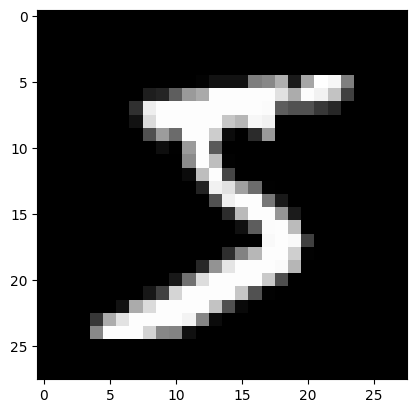

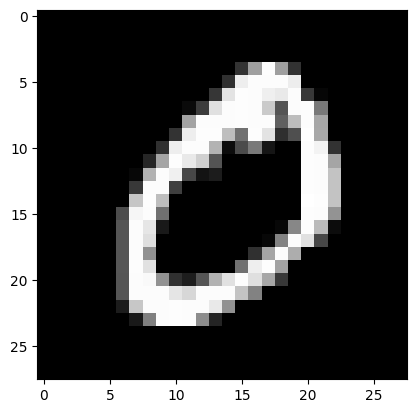

In [ ]:
#DISPLAY THE IMAGE
show = 2  #The code will dislplay 2 images from the dataset
max_show = show
for i in full_train_set:   #i[0] is the image(Pytorch tensor) and i[1] is the label(digit between 0-9)
  current_image = i[0][0]
  plt.figure(max_show+1-show)
  plt.imshow(current_image,cmap = 'gray')  #Displays the grayscale image,cmap = 'gray' ensures grayscale dislplay
  print(current_image.shape) #Displays the shpae of the image
  show-=1
  if show==0:   #It stops tje loop after showing 2 images
    break

In [ ]:
'''
USING TORCH DATA-LOADER
'''
#torch.utlis.DataLoader : The data loader takes the dataset and returns mini batches of data

train_loader = torch.utils.data.DataLoader(dataset=full_train_set,batch_size=batch_size,shuffle=False)  #shuffle = False means it will load data in the same order after every epoch
test_loader = torch.utils.data.DataLoader(dataset=full_test_set,batch_size=batch_size,shuffle=False)

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num=10):    #num = 10 specifies the number of output classes(10 is default for MNIST dataset)
        super(AlexNet, self).__init__()  #It calls the parent class(nn.Module) constructor
        self.feature = nn.Sequential(       #Feature extraction(It consist a series of convo layers to extract spatial features)
            nn.Conv2d(1, 256, kernel_size=5, stride=1, padding=2), #1st convo layer which takes a grayscale image and uses 256 filters and padding of 2 ensures output size remains the same
            nn.ReLU(inplace=True),     #Applies the Relu activation function and removes the negative values
            nn.MaxPool2d( kernel_size=3, stride=2), #Reduces spatial dimensions by taking max values in 3*3 region with a stride of 2
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1), #2nd Convo layer with input channels = 256 and output channels = 384
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1), #3rd convo layer with 384 filters
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),  #4th convo layer with 256 channels
            nn.ReLU(inplace=True)
        )  #This structure allows the network to capture complex heirarichal features from the image
        self.classifier = nn.Sequential(
            nn.Dropout(), #Prevents overfitting by randomly setting some neurons to 0 during training
            nn.Linear(256*13*13,2048), #Fully connected layer, output size is 2048 neurons
            nn.ReLU(inplace=True),    #Adds non-Linearity
            nn.Dropout(),
            nn.Linear(2048,1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024,num)    #Final output layer mapping to 10 output classes
        )

    def forward(self, x):   #Forward pass: The input image x(shape[batch_size,1,28,28]) is passed through self.feature and feature maps are produced with 256 channels

        x = self.feature(x)
        x = x.view(-1,256*13*13) #This converts the 3D tensor into a 2D tensor as fully connected layer only accepts 2D inputs
        x = self.classifier(x)   #The flattened vector is passed through self.classifier
        return x   #The final output has num classes

In [ ]:

'''
ANALYZING TORCH MODEL SUMMARY
'''

model = AlexNet()

'''
ACCLERATED COMPUTING
'''

if torch.cuda.is_available():
  print('GPU is available!')
  model.cuda()

summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 256, 28, 28]           6,656
              ReLU-2          [-1, 256, 28, 28]               0
         MaxPool2d-3          [-1, 256, 13, 13]               0
            Conv2d-4          [-1, 384, 13, 13]         885,120
              ReLU-5          [-1, 384, 13, 13]               0
            Conv2d-6          [-1, 384, 13, 13]       1,327,488
              ReLU-7          [-1, 384, 13, 13]               0
            Conv2d-8          [-1, 256, 13, 13]         884,992
              ReLU-9          [-1, 256, 13, 13]               0
          Dropout-10                [-1, 43264]               0
           Linear-11                 [-1, 2048]      88,606,720
             ReLU-12                 [-1, 2048]               0
          Dropout-13                 [-1, 2048]               0
           Linear-14                 [-

In [ ]:
'''
MODEL TRAINING AND TESTING FUNCTIONS
'''

train_losses = []
test_losses = []



#Workflow in Training Loop
'''
1)Reset gradients → optimizer.zero_grad()
2)Forward pass → Compute model output
3)Compute loss → Compare output to target
4)Backward pass → Compute gradients (loss.backward())
5)Update weights → optimizer.step()
'''
def train(model,optimizer,train_loader,epoch):
    model.train() #Sets the model to training mode
    for batch_idx, (data, target) in enumerate(train_loader):   #This loop iterates over the mini-batches from the dataset
        if torch.cuda.is_available():      #If GPU is available,move both data and target to GPU for faster computation
            data, target = data.cuda(), target.cuda()
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad() #This is used to reset the gradients of all model parameters before backpropagation
        output = model(data)    #The input data is passed through the model and model produces output predictions(in the form of raw logits)
        loss = F.cross_entropy(output, target) #It computes the cross-entropy loss,commonly used for classification tasks
        train_losses.append(loss.item()) #Saves the loss in the list for future analysis
        loss.backward()   #Computes gradient of the loss function with respect to each parameter(weights and biases)
        optimizer.step() #The optimizer updates the model's parameters
        if batch_idx % 100 == 0:
            print('\rEpoch: {} {:.0f}%\t     Loss: {:.6f}'.format(
                epoch,
                100. * batch_idx / len(train_loader), loss.item()), end='')

def test(model, test_loader):
    model.eval() #This tells PyTorch that the model is in testing mode(Some layers like dropout and batch normalization behave differently in testing)
    test_loss = 0 #Tracks total loss for the entire test dataset
    correct = 0 #Count the number of correctly classified samples
    with torch.no_grad():  # Entire evaluation should be within no_grad(Disables gradient tracking since we are only testing,not training )
        for data, target in test_loader:
            if torch.cuda.is_available(): #Moves data and target to GPU if available
                data, target = data.cuda(), target.cuda()

            output = model(data)  #Model's prediction logits for data
            test_loss += F.cross_entropy(output, target, reduction='sum').item() #Compute the loss between predictions and true labels(reduction = 'sum' ensures the loss is summed over all samples in the test), '.item' converts the loss from Pytorch tensor to a Python number

            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    # Compute average loss (after loop)
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    # Compute accuracy
    acc = 100. * float(correct.to(torch.device('cpu')).numpy()) / len(test_loader.dataset)

    # Print results
    print('\nTest result: Average loss: {:.4f}, Accuracy: {:.4f}%\n'.format(test_loss, acc))

    return acc




In [ ]:
'''
INITIALIZE THE OPTIMIZER - LOSS FUNCTION
'''

optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
'''
TRAIN AND TEST THE MODEL
'''

epochs = 2

for epoch in range(1, epochs+1):
    train(model,optimizer,train_loader,epoch)
    accuracy = test(model,test_loader)
    # print(f'----------------')
    # print(f'Epoch: {epoch+1}')
    # print(f'Accuracy: {accuracy}')

Epoch: 1 99%	     Loss: 0.037282
Test result: Average loss: 0.0948, Accuracy: 96.8700%

Epoch: 2 99%	     Loss: 0.007293
Test result: Average loss: 0.0524, Accuracy: 98.2700%

